In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [11]:
import pickle
with open('sim_dict_0', 'rb') as f:
    results = pickle.load(f)

In [12]:
results.keys()

dict_keys([(20, 1, 0), (20, 2, 0), (20, 3, 0), (20, 4, 0), (20, 5, 0), (20, 6, 0), (20, 7, 0), (20, 10, 0), (20, 14, 0), (20, 18, 0), (100, 5, 0), (100, 10, 0), (100, 15, 0), (100, 20, 0), (100, 25, 0), (100, 30, 0), (100, 35, 0), (100, 50, 0), (100, 70, 0), (100, 90, 0), (200, 10, 0), (200, 20, 0), (200, 30, 0), (200, 40, 0), (200, 50, 0), (200, 60, 0), (200, 70, 0), (200, 100, 0), (200, 140, 0), (200, 180, 0), (500, 10, 0), (500, 20, 0), (500, 30, 0), (500, 40, 0), (500, 50, 0), (500, 60, 0), (500, 70, 0), (500, 100, 0), (500, 140, 0), (500, 180, 0), (1000, 10, 0), (1000, 20, 0), (1000, 30, 0), (1000, 40, 0), (1000, 50, 0), (1000, 60, 0), (1000, 70, 0), (1000, 100, 0), (1000, 140, 0), (1000, 180, 0)])

In [13]:
final_table = []
for key in results:
    print(key)
    if len(results[key]) == 8:
        for run in results[key]:
            for res in run[key]:
                tab = pd.DataFrame.from_dict(res, orient = 'index').reset_index()
                tab.rename(columns = {'index':'method'}, inplace = True)
                tab['d'] = [key[0]] * 3
                tab['d0'] = [key[1]] * 3
                tab['rho'] = [key[2]] * 3
                final_table.append(tab)
    else:
        for run in results[key]:
            tab = pd.DataFrame.from_dict(run, orient = 'index').reset_index()
            tab.rename(columns = {'index':'method'}, inplace = True)
            tab['d'] = [key[0]] * 3
            tab['d0'] = [key[1]] * 3
            tab['rho'] = [key[2]] * 3
            final_table.append(tab)
final_table = pd.concat(final_table)

(20, 1, 0)
(20, 2, 0)
(20, 3, 0)
(20, 4, 0)
(20, 5, 0)
(20, 6, 0)
(20, 7, 0)
(20, 10, 0)
(20, 14, 0)
(20, 18, 0)
(100, 5, 0)
(100, 10, 0)
(100, 15, 0)
(100, 20, 0)
(100, 25, 0)
(100, 30, 0)
(100, 35, 0)
(100, 50, 0)
(100, 70, 0)
(100, 90, 0)
(200, 10, 0)
(200, 20, 0)
(200, 30, 0)
(200, 40, 0)
(200, 50, 0)
(200, 60, 0)
(200, 70, 0)
(200, 100, 0)
(200, 140, 0)
(200, 180, 0)
(500, 10, 0)
(500, 20, 0)
(500, 30, 0)
(500, 40, 0)
(500, 50, 0)
(500, 60, 0)
(500, 70, 0)
(500, 100, 0)
(500, 140, 0)
(500, 180, 0)
(1000, 10, 0)
(1000, 20, 0)
(1000, 30, 0)
(1000, 40, 0)
(1000, 50, 0)
(1000, 60, 0)
(1000, 70, 0)
(1000, 100, 0)
(1000, 140, 0)
(1000, 180, 0)


In [14]:
final_table

,method,nll,KL,KL_theta_train,KL_theta_test,size,d,d0,rho
0,FWD,102.702339,54.658763,3.482671,1.878018,2,20,1,0
1,LASSO,100.000000,51.956424,0.087287,0.038067,0,20,1,0
2,SLOPE,99.129222,51.085646,0.768356,0.278450,3,20,1,0
0,FWD,99.041853,54.340508,5.588122,2.804684,3,20,1,0
1,LASSO,97.601259,52.899914,1.314140,0.538765,2,20,1,0
...,...,...,...,...,...,...,...,...,...
1,LASSO,100.036870,70.971160,25.124483,8.896987,1,1000,180,0
2,SLOPE,100.000000,70.934290,25.155681,8.882838,0,1000,180,0
0,FWD,100.238288,72.494266,33.144000,13.824146,2,1000,180,0
1,LASSO,98.644533,70.900510,27.929641,10.214675,35,1000,180,0


In [15]:
d_d0 = final_table[['d', 'd0']].drop_duplicates()
sim_settings = {d: [] for d in d_d0['d'].unique()}
for i in d_d0.values:
    sim_settings[i[0]].append(i[1])
sim_settings

{20: [1, 2, 3, 4, 5, 6, 7, 10, 14, 18],
 100: [5, 10, 15, 20, 25, 30, 35, 50, 70, 90],
 200: [10, 20, 30, 40, 50, 60, 70, 100, 140, 180],
 500: [10, 20, 30, 40, 50, 60, 70, 100, 140, 180],
 1000: [10, 20, 30, 40, 50, 60, 70, 100, 140, 180]}

In [16]:
final_table.head(50)

,method,nll,KL,KL_theta_train,KL_theta_test,size,d,d0,rho
0,FWD,102.702339,54.658763,3.482671,1.878018,2,20,1,0
1,LASSO,100.000000,51.956424,0.087287,0.038067,0,20,1,0
2,SLOPE,99.129222,51.085646,0.768356,0.278450,3,20,1,0
0,FWD,99.041853,54.340508,5.588122,2.804684,3,20,1,0
1,LASSO,97.601259,52.899914,1.314140,0.538765,2,20,1,0
2,SLOPE,100.000000,55.298655,0.127943,0.052679,0,20,1,0
0,FWD,100.736625,61.397110,0.277037,0.225727,2,20,1,0
1,LASSO,100.000000,60.660485,0.115413,0.065291,0,20,1,0
2,SLOPE,100.000000,60.660485,0.115413,0.065291,0,20,1,0
0,FWD,99.432100,59.319200,0.516312,0.260977,2,20,1,0


In [17]:
# %pip install latex

20 [2, 4, 6, 10, 18]
200 [20, 40, 60, 100, 180]
1000 [20, 40, 60, 100, 180]


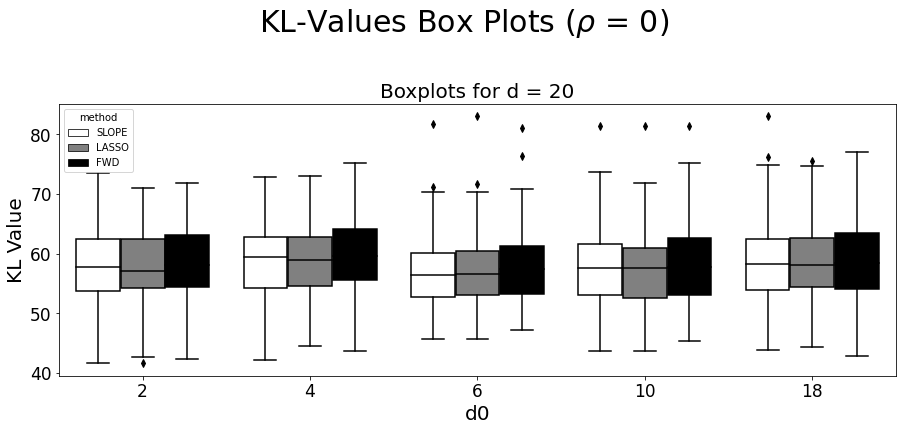

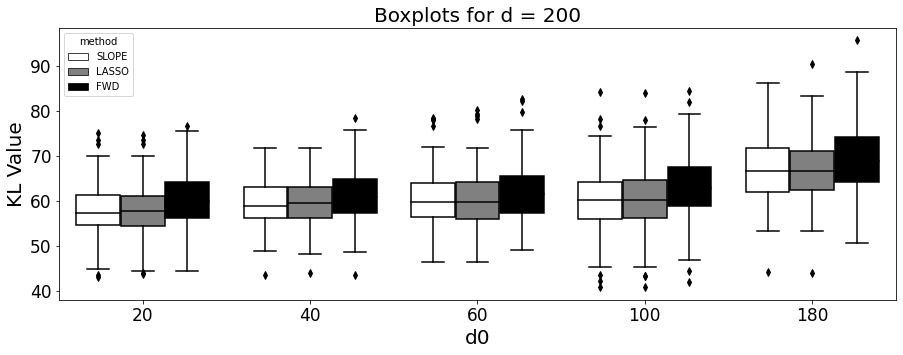

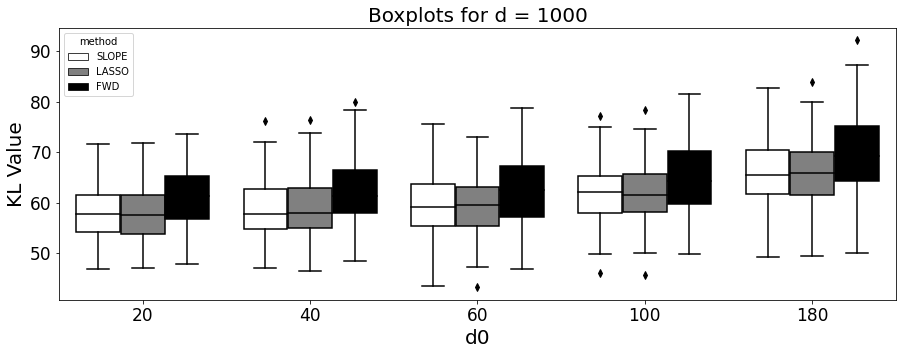

In [56]:
import seaborn as sns
from matplotlib import rc
# import latex
# plt.rcParams.update({
#     "text.usetex": True,
#     "font.family": "Helvetica"
# })

# Select what KL to show

KL = 'KL'
palette ={"SLOPE": "white", "FWD": "black", "LASSO": "grey"}
for d in sim_settings:
    if d not in [20, 200, 1000]:
        continue
    d0_list = [d0 for ind, d0 in enumerate(sim_settings[d]) if (ind+1) % 2 == 0]
    print(d, d0_list)
    d_table = final_table[(final_table['d'] == d) & (final_table['d0'].isin(d0_list))][['method',KL,'d','size','d0']]
    d_table.sort_values(by = 'method', ascending = False, inplace = True)
    fig, ax = plt.subplots(figsize = (15,5))
    if d == 20:
        fig.suptitle(r'KL-Values Box Plots ($\rho$ = 0)', size = 30, y=1.15)
#     for i in ax:
    sns.boxplot(x = d_table['d0']
                , y = d_table[KL]
                , hue = d_table['method']
                , ax = ax
                , palette = palette)
    ax.set_title('Boxplots for d = {}'.format(d), size = 20)
    ax.xaxis.set_tick_params(labelsize=17)
    ax.yaxis.set_tick_params(labelsize=17)
    ax.set_xlabel(ax.get_xlabel(), size = 20)
    ax.set_ylabel('KL Value', size = 20)
#     ax.set_xticklabels(list(ax.get_xticklabels()), size = 20)
#     ax.set_yticklabels(list(ax.get_yticklabels()), size = 20)

In [32]:
d, d0_list

((4, 1000), [20, 40, 60, 100, 180])

20 [2, 4, 6, 10, 18]
200 [20, 40, 60, 100, 180]
1000 [20, 40, 60, 100, 180]


C:\Users\User\AppData\Local\Temp\ipykernel_8720\499770301.py:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([l for l in ax.get_yticklabels()],size = 15)
C:\Users\User\AppData\Local\Temp\ipykernel_8720\499770301.py:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([l for l in ax.get_yticklabels()],size = 15)
C:\Users\User\AppData\Local\Temp\ipykernel_8720\499770301.py:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([l for l in ax.get_yticklabels()],size = 15)


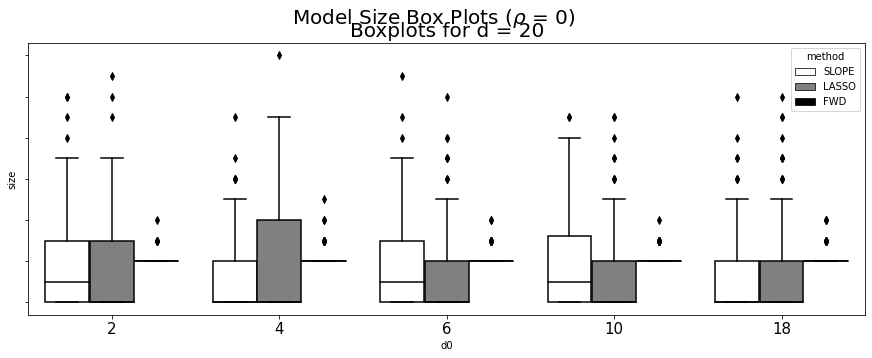

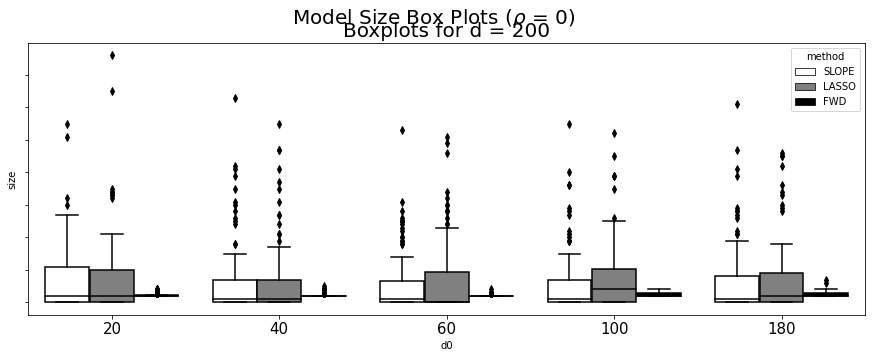

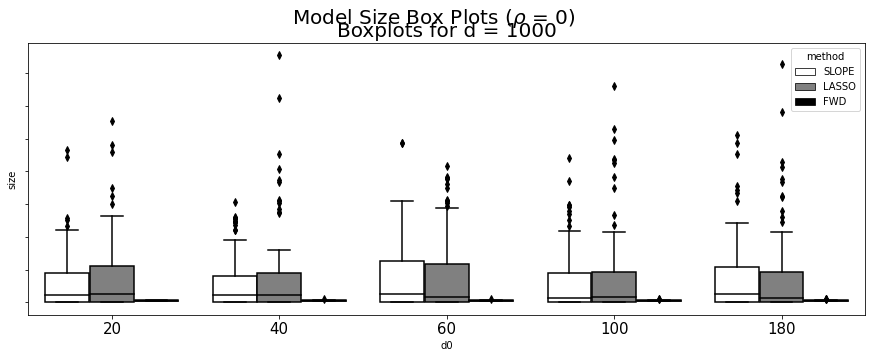

In [22]:
import seaborn as sns
from matplotlib import rc
# import latex
# plt.rcParams.update({
#     "text.usetex": True,
#     "font.family": "Helvetica"
# })
# Select what KL to show
palette ={"SLOPE": "white", "FWD": "black", "LASSO": "grey"}
for d in sim_settings:
    if d not in [20, 200, 1000]:
        continue
    d0_list = [d0 for ind, d0 in enumerate(sim_settings[d]) if (ind+1) % 2 == 0]
    print(d, d0_list)
    d_table = final_table[(final_table['d'] == d) & (final_table['d0'].isin(d0_list))][['method','d','size','d0']]
    d_table.sort_values(by = 'method', ascending = False, inplace = True)
    fig, ax = plt.subplots(figsize = (15,5))
    if d == 20:
        fig.suptitle(r'Model Size Box Plots ($\rho$ = 0)', size = 30, y=1.15)
#     for i in ax:
    sns.boxplot(x = d_table['d0']
                , y = d_table['size']
                , hue = d_table['method']
                , ax = ax
                , palette = palette)
    ax.set_title('Boxplots for d = {}'.format(d), size = 20)
    ax.xaxis.set_tick_params(labelsize=17)
    ax.yaxis.set_tick_params(labelsize=17)
    ax.set_xlabel(ax.get_xlabel(), size = 20)
    ax.set_ylabel('KL Value', size = 20)